# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('faithful.csv')

In [3]:
data.head(10)

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
5,6,2.883,55
6,7,4.700,88
7,8,3.600,85
8,9,1.950,51
9,10,4.350,85


In [4]:
data.describe()

,Unnamed: 0,eruptions,waiting
count,272.000000,272.000000,272.000000
mean,136.500000,3.487783,70.897059
std,78.663842,1.141371,13.594974
min,1.000000,1.600000,43.000000
25%,68.750000,2.162750,58.000000
50%,136.500000,4.000000,76.000000
75%,204.250000,4.454250,82.000000
max,272.000000,5.100000,96.000000


In [26]:
data = data.drop(['Unnamed: 0'], axis=1)

# Univariate Analysis

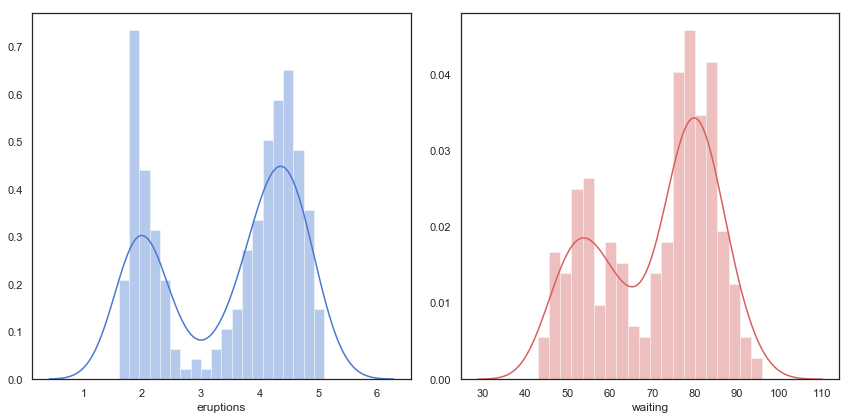

In [12]:
sns.set(style="white", palette="muted", color_codes=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# plotting distribution of father's height
sns.distplot(data.eruptions, bins=20, color = 'b', ax = axes[0])

# plotting distribution of mother's height
sns.distplot(data.waiting, bins=20, color = 'r', ax = axes[1])

plt.tight_layout()

Text(0, 0.5, 'Eruptions')

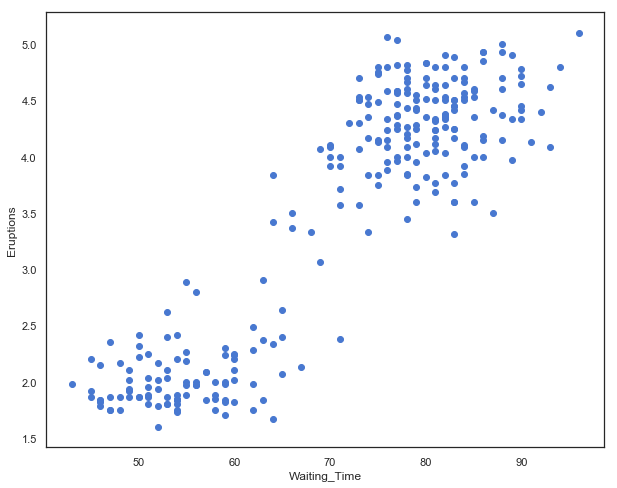

In [96]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8
plt.scatter(data.waiting, data.eruptions)
plt.xlabel('Waiting_Time')
plt.ylabel('Eruptions')

There seems to be a bimodality in data!

# Standardising the data

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), 
                           columns=[['eruptions', 'waiting']])

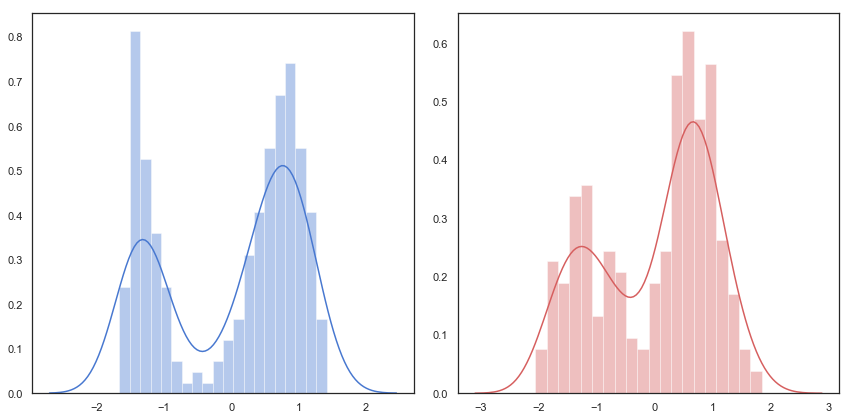

In [86]:
sns.set(style="white", palette="muted", color_codes=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# plotting distribution of father's height
sns.distplot(data_scaled.eruptions, bins=20, color = 'b', ax = axes[0])

# plotting distribution of mother's height
sns.distplot(data_scaled.waiting, bins=20, color = 'r', ax = axes[1])

plt.tight_layout()

# Regression Analysis

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import scipy

X_train, X_test, y_train, y_test = train_test_split(data_scaled.eruptions, data_scaled.waiting, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_hat = model_lr.predict(X_test)
r2_score(y_test, y_hat)

0.7219852692370701

In [31]:
scipy.stats.pearsonr(y_test, y_hat)

(array([0.85446288]), array([1.93122554e-20]))

In [32]:
model_lr.intercept_, model_lr.coef_

(array([-0.01047215]), array([[0.91333257]]))

# Kernel PCA

In [87]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(data_scaled)
X_back = kpca.inverse_transform(X_kpca)

In [88]:
data_kpca= pd.DataFrame(data=X_back, columns=[['eruptions_kpca','waiting_kpca']], index=data.index)

In [89]:
data_kpca.head()

,eruptions_kpca,waiting_kpca
0,0.053068,0.312421
1,-1.339117,-1.128849
2,-0.067922,0.114352
3,-0.562513,-0.348536
4,0.678532,0.753159


Text(0, 0.5, 'Eruptions')

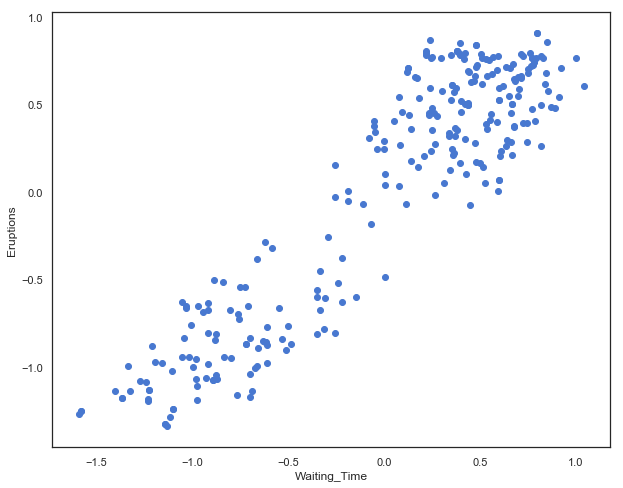

In [95]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8
#ax = sns.scatterplot(x='eruptions_kpca', y='eruptions_kpca', data=data_kpca)
plt.scatter(data_kpca.waiting_kpca, data_kpca.eruptions_kpca)
plt.xlabel('Waiting_Time')
plt.ylabel('Eruptions')

# Hidden Markov Models

In [109]:
from hmmlearn import hmm

model_hmm = hmm.GaussianHMM(2, "full", n_iter=100)

In [110]:
model_hmm.fit(X_train)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [111]:
X_hat = model_hmm.predict(X_test)

In [112]:
r2_score(X_test, X_hat)

0.3037853083739056

In [113]:
hmm_predictions = pd.DataFrame(X_hat, columns = ['X_pred'])
hmm_predictions['X_test'] = X_test.reset_index(drop=True)
hmm_predictions.head()

,X_pred,X_test
0,1,0.712927
1,0,-1.027660
2,1,0.098499
3,1,0.888478
4,1,0.010723


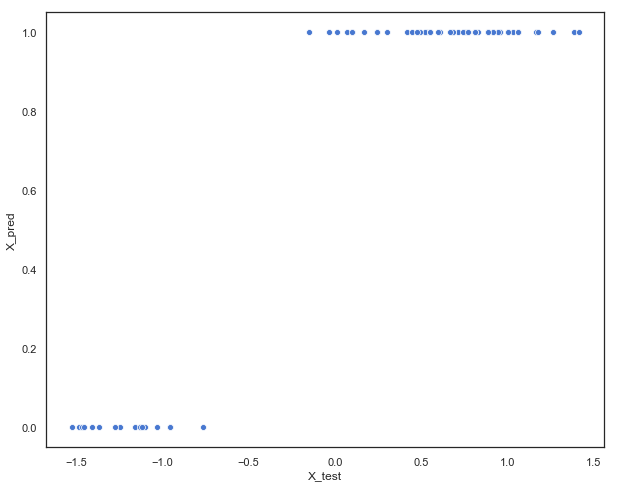

In [114]:
rcParams['figure.figsize'] = 10,8
ax = sns.scatterplot(x='X_test', y='X_pred', data=hmm_predictions)